# Covid-19 Genome analysis using Biopython

### Fetch COVID-19 Genome from NCBI
**MN908947** - covid-19 genome used here was sequenced from a sample of bronchoalveolar lavage fluid from a single patient who was a worker at the market and who was admitted to the Central Hospital of Wuhan on 26 December 2019

Download Biopython

In [2]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.3 MB/s eta 0:00:00


In [3]:
from Bio import Entrez, SeqIO
Entrez.email = ""
handle = Entrez.efetch(db="nucleotide", id="MN908947", rettype="gb", retmode="text")
recs = list(SeqIO.parse(handle, 'gb'))
handle.close()

In [4]:
recs

[SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947', description='Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])]

In [5]:
covid_dna = recs[0].seq

In [6]:
covid_dna

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [8]:
print(f"Covid DNA consists of {len(covid_dna)} nucleotides")

Covid DNA consists of 29903 nucleotides


Let's Calculate Molecular weight

In [9]:
from Bio.SeqUtils import molecular_weight
molecular_weight(covid_dna)

9241219.214400413

#### GC Content
Higher GC content implies more stable molecules due to G and C forming triple hydrogen bonds.

In [13]:
from Bio.SeqUtils import gc_fraction
gc_fraction(covid_dna, "ignore")

0.3797277865097147

#### Distribution of nucleotides in COVID-19 genome

In [14]:
nucleotides_count = {
    'A' : covid_dna.count("A"),
    'T' : covid_dna.count("T"),
    'G' : covid_dna.count("G"),
    'C' : covid_dna.count("C")
}

In [15]:
nucleotides_count

{'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492}

#### Nucleotide feequency :

Text(0.5, 1.0, 'Nucleotide Frequency')

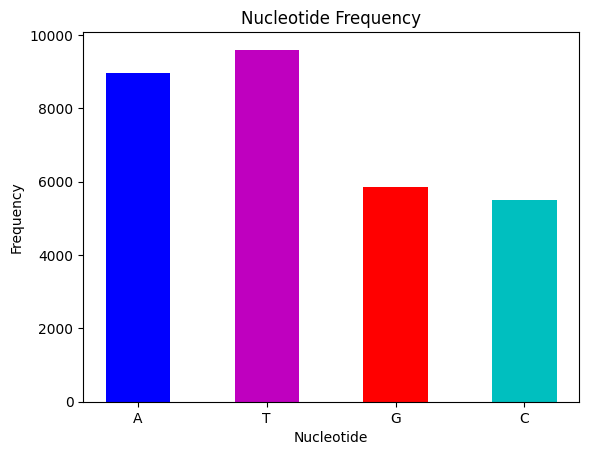

In [19]:
import matplotlib.pyplot as plt
width = 0.5
plt.bar(nucleotides_count.keys(), nucleotides_count.values(), width, color=["b", "m", "r", "c"])
plt.xlabel("Nucleotide")
plt.ylabel("Frequency")
plt.title("Nucleotide Frequency")


The initial analysis indicates that the nucleotides adenine (A) and thymine (T) occur more frequently than cytosine (C) and guanine (G) within the sequence.

Comprehending this genetic code is essential for the development of treatments and vaccines. The critical task at hand is deciphering the substantial data encoded within these extensive sequences of nucleotides.

This decoding is accomplished through a process known as gene expression. Gene expression is the method through which the instructions in a gene guide the production of a functional product, typically proteins, which perform a multitude of functions in the organism.

#### Transcription
Transcription is the initial phase of gene expression. This process entails transcribing the sequence of DNA from a gene to synthesize a corresponding RNA strand.

In [20]:
covid_mrna = covid_dna.transcribe()
covid_mrna

Seq('AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGU...AAA')

#### Translation :
Translation is the biological mechanism by which the genetic code carried by messenger RNA (mRNA) is translated into a sequence of amino acids, forming the building blocks of proteins.

In [21]:
covid_amino_acids = covid_mrna.translate()
covid_amino_acids

/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

##### Most common amino acids

In [23]:
from collections import Counter
common_amino = Counter(covid_amino_acids)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

In [25]:
del common_amino["*"]

Text(0.5, 1.0, 'Protein Sequence Frequency')

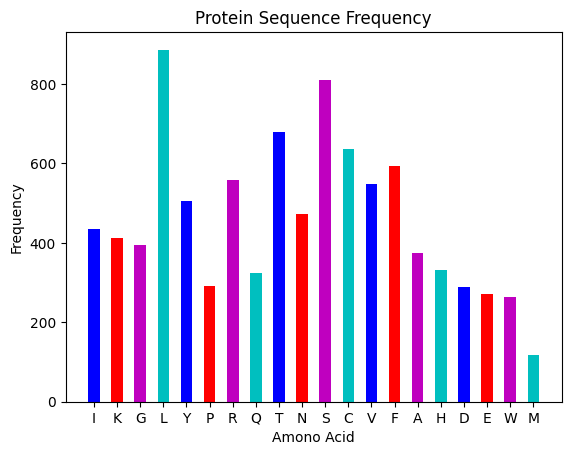

In [28]:
width = 0.5
plt.bar(common_amino.keys(), common_amino.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel("Amono Acid")
plt.ylabel("Frequency")
plt.title("Protein Sequence Frequency")

In [29]:
print(f"Covid-19's genome has {sum(common_amino.values())} amino acids")

Covid-19's genome has 9193 amino acids


The split() function splits the sequence at any stop codon and keeps the amino acids chains separated. This makes it easier for further analysis.

In [32]:
proteins = covid_amino_acids.split('*')

In [35]:
print(f"We have {len(proteins)} amino acid sequences in covid")

We have 775 amino acid sequences in covid


It should be noted that not all sequences of amino acids qualify as proteins. Functional proteins are encoded by sequences consisting of over 20 amino acids. Shorter amino acid sequences, known as oligopeptides, serve different roles. In our discussion, we will concentrate on the longer chains composed of more than 20 amino acids, which are categorized as proteins.

In [36]:
# Lets remove all the proteins which are having less than 20 amono acids
for protein in proteins:
  if len(protein) < 20:
    proteins.remove(protein)



In [37]:
print(f"We have {len(proteins)} proteins with more than 20 amono acids in the covid-19 genome")

We have 409 proteins with more than 20 amono acids in the covid-19 genome


In [38]:
top_5_proteins = sorted(proteins, key=len)

In [40]:
len(top_5_proteins)

409

In [39]:
top_5_proteins[-1]

Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN')

In [41]:
len(top_5_proteins[-1])

2701

Saving this protein to file for further analysis

In [42]:
with open("protein_seq.fasta", "w") as file:
    file.write(f">covid protein\n{top_5_proteins[-1]}")

### Findings Overview:

- Total base pairs: 29,903
- GC content: 37.97%
- Predominant amino acids: Leucine (L) and Serine (S)
- Proteins exceeding 20 amino acids: 409
- Longest protein contains: 2,701 amino acids